<a href="https://colab.research.google.com/github/190031319PHemanthBhargav/Machine-Learning-Models/blob/main/checkbox_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
!unzip Raw_Dataset.zip

Archive:  Raw_Dataset.zip
replace Raw_Dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

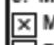

In [ ]:
from IPython.display import Image
Image('/content/Raw_Dataset/img-4.jpg')

In [ ]:
img = cv2.imread('/content/Raw_Dataset/img-1.jpg')

def plotting(img,cmap=None):
  plt.figure(figsize=(10,10))
  plt.imshow(img,cmap=cmap)

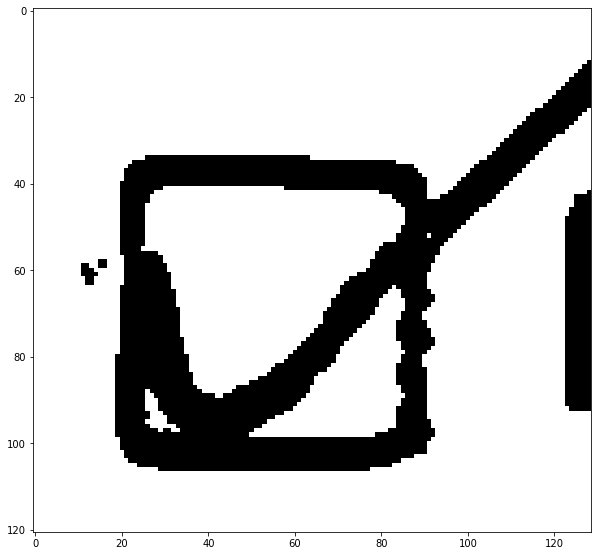

In [ ]:
plot_flag=True
save_output=True
out_folder='outs'
os.makedirs(out_folder,exist_ok=True)

if plot_flag:
  plotting(img)

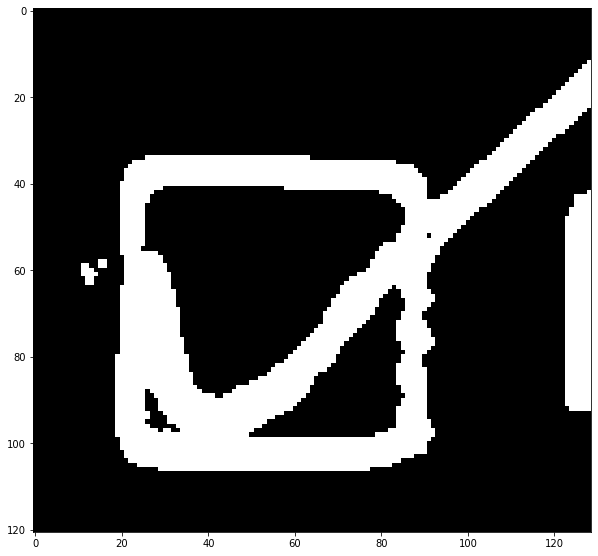

In [ ]:
imgpath='/content/Raw_Dataset/img-1.jpg'
grey_scaling = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
t1,img_bin = cv2.threshold(grey_scaling,150,225,cv2.THRESH_BINARY)
img_bin = ~img_bin
if plot_flag:
  plotting(img_bin,'gray')
if save_output:
  cv2.imwrite(os.path.join(out_folder,f'bin_{imgpath}'),img_bin)

In [ ]:
img_width_min = 10

kernel_h = np.ones((1,img_width_min),np.uint8)
kernel_v = np.ones((img_width_min,1),np.uint8)

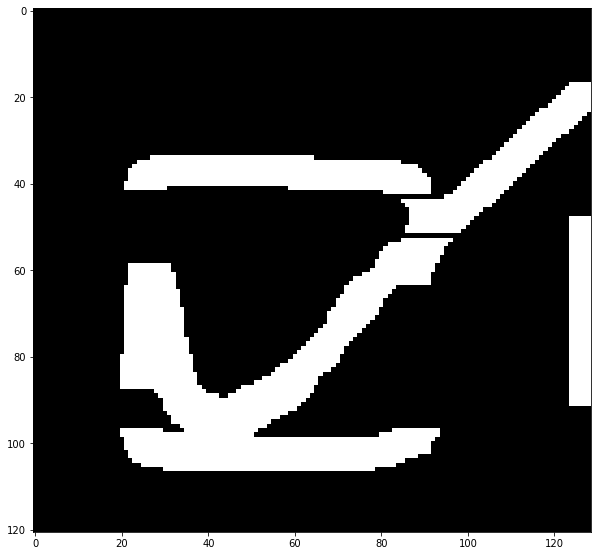

In [ ]:
img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel_h)
if plot_flag:
  plotting(img_bin_h,'gray')
if save_output:
  cv2.imwrite(os.path.join(out_folder,f'hor_{imgpath}'), img_bin_h)

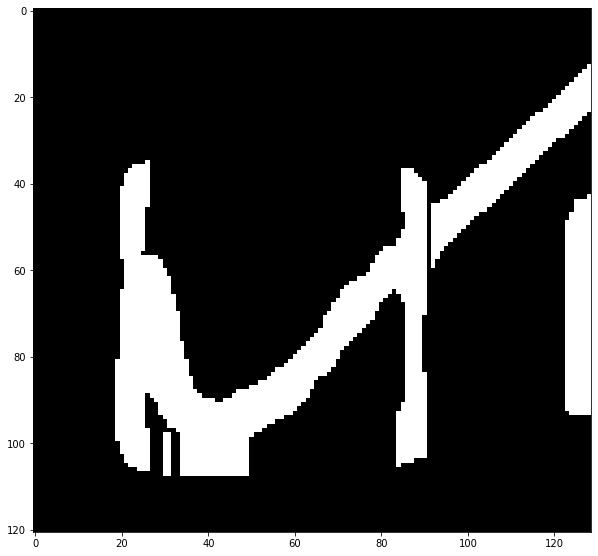

In [ ]:
img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel_v)
if plot_flag:
  plotting(img_bin_v,'gray')
if save_output:
  cv2.imwrite(os.path.join(out_folder,f'ver_{imgpath}'), img_bin_v)

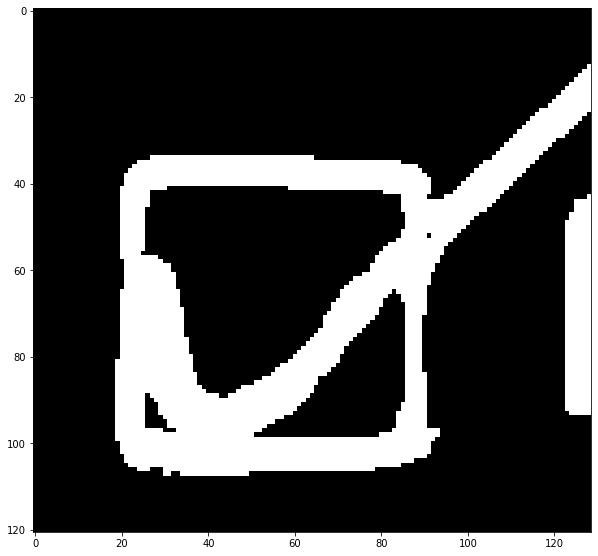

In [ ]:
final = img_bin_h|img_bin_v
if plot_flag:
  plotting(final,'gray')
if save_output:
  cv2.imwrite(os.path.join(out_folder,f'merge_{imgpath}'), final)

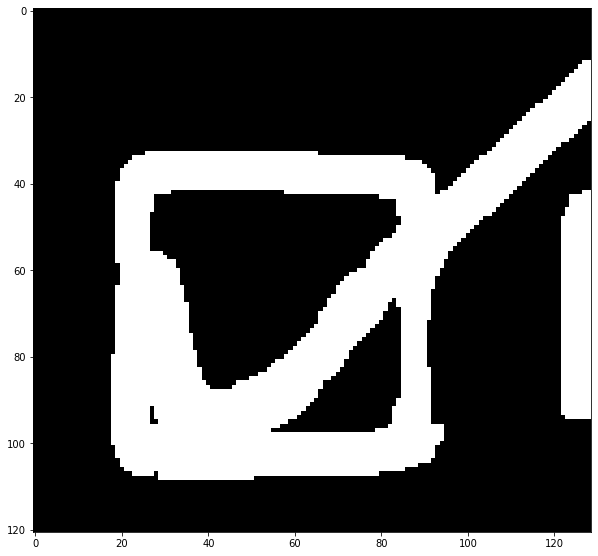

In [ ]:
final_kernel = np.ones((3,3),np.uint8)
final = cv2.dilate(final,final_kernel,iterations=1)
if plot_flag:
  plotting(final,'gray')
if save_output:
  cv2.imwrite(os.path.join(out_folder,f'final_bin_{imgpath}'),final)

In [ ]:
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(~final, connectivity=8, ltype=cv2.CV_32S)


In [ ]:
def imshow_components(labels):
  label_hue = np.uint8(179*labels/np.max(labels))
  empty_channel = 255*np.ones_like(label_hue)
  labeled_img = cv2.merge([label_hue, empty_channel, empty_channel])

  labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
  labeled_img[label_hue==0]=0

  return labeled_img

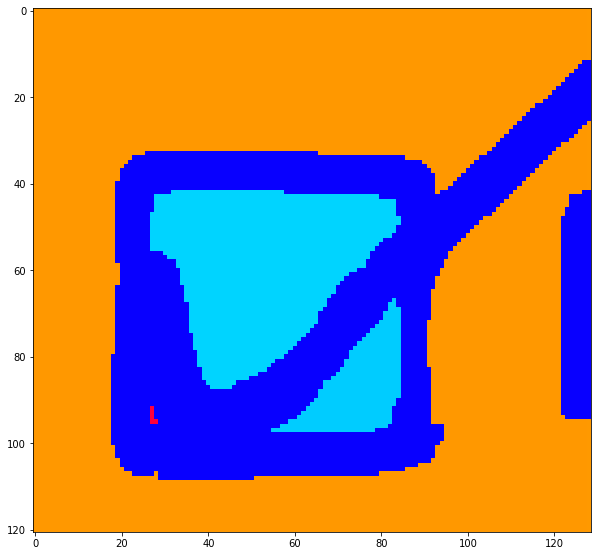

In [ ]:
out_img = imshow_components(~labels)
if plot_flag:
  plotting(out_img)
if save_output:
  cv2.imwrite(os.path.join(out_folder,f'cc_{imgpath}'),out_img)

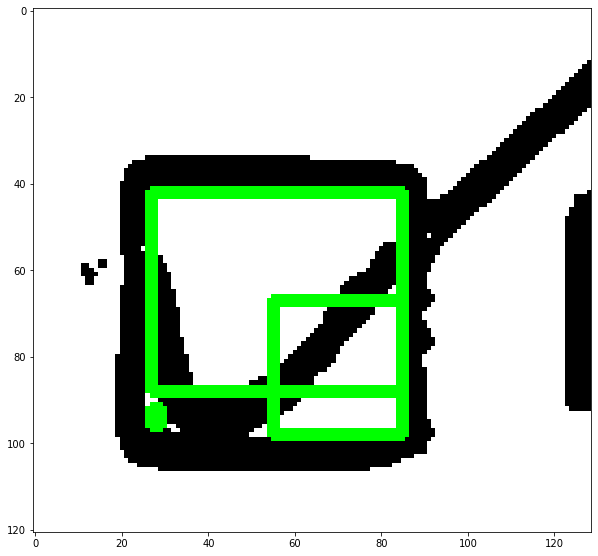

In [ ]:
for x,y,w,h,area in stats[2:]:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

if plot_flag:
  plotting(img)
if save_output:
  cv2.imwrite(os.path.join(out_folder, f'output_{imgpath}'),img)

In [ ]:
def box_detection(img, img_width_min=3):
  grey_scaling=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  th1,img_bin = cv2.threshold(grey_scaling, 150, 225, cv2.THRESH_BINARY)
  kernel6h = np.ones((1,img_width_min), np.uint8)
  kernel6v = np.ones((img_width_min,1),np.uint8)
  img_bin_h = cv2.morphologyEx(~img_bin, cv2.MORPH_OPEN, kernel6h)
  img_bin_v = cv2.morphologyEx(~img_bin, cv2.MORPH_OPEN, kernel6v)
  final = img_bin_h|img_bin_v
  final_kernel = np.ones((3,3), np.uint8)
  final = cv2.dilate(final,final_kernel,iterations=1)
  ret, labels, stats, centroids = cv2.connectedComponentsWithStats(~final, connectivity=8, ltype=cv2.CV_32S)
  return stats, labels

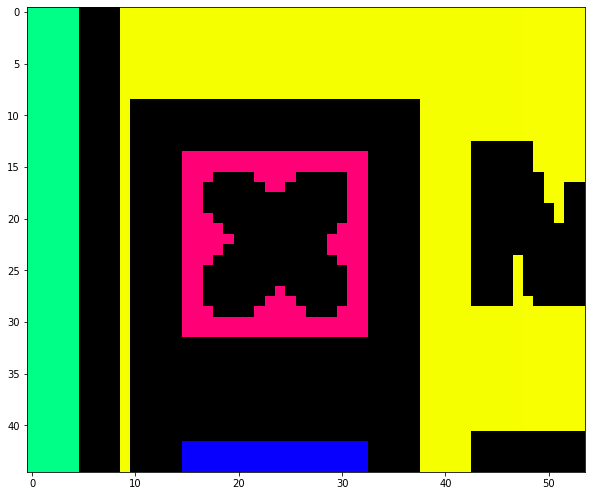

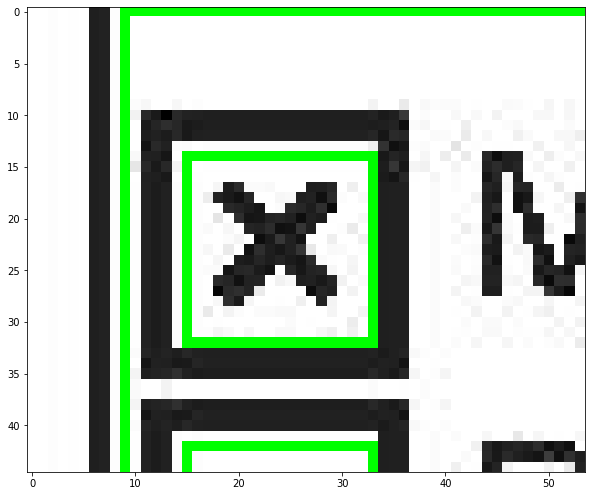

In [ ]:
imgpath='/content/Raw_Dataset/img-3.jpg'
img = cv2.imread(imgpath)
stats, labels = box_detection(img)
cc_out= imshow_components(labels)

for x,y,w,h,area in stats[2:]:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)

if plot_flag:
  plotting(cc_out)
  plotting(img)

if save_output:
  cv2.imwrite(os.path.join(out_folder, f'cc_{imgpath}'),cc_out)
  cv2.imwrite(os.path.join(out_folder, f'out_{imgpath}'),img)

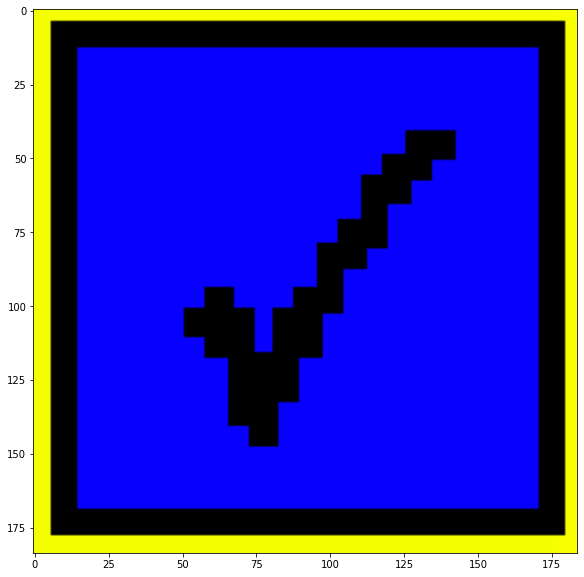

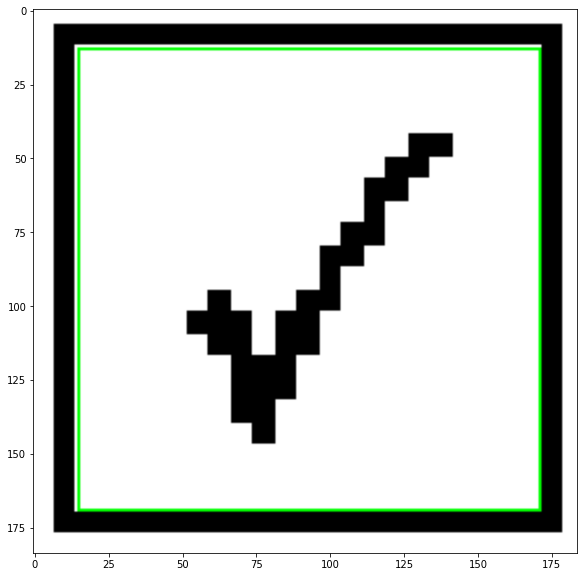

In [ ]:
imgpath='/content/Clean_Image.jpg'
img = cv2.imread(imgpath)
stats, labels = box_detection(img)
cc_out= imshow_components(labels)

for x,y,w,h,area in stats[2:]:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)

if plot_flag:
  plotting(cc_out)
  plotting(img)

if save_output:
  cv2.imwrite(os.path.join(out_folder, f'cc_{imgpath}'),cc_out)
  cv2.imwrite(os.path.join(out_folder, f'out_{imgpath}'),img)